# Modern Deep Learning: 

# Keras로 단순한 CNN을 사용하여 Fashion-MNIST 분류하기

<br> By Margaret Maynard-Reid, 4/24/2018

![alt text](https://github.com/margaretmz/deep-learning/blob/master/images/modern%20dl_fash-mnist_keras.png?raw=1)

## 주피터 노트북을 사용하는 이유


*   웹 브라우저 인터렉티브 프로그래밍
*   시각화에 뛰어남
*   협업에 뛰어남
*   머신러닝 / 딥러닝 공부하는데 인기있는 툴




## Fashion-MNIST를 사용하는 이유


*   MNIST 는 너무 쉬움
*   MNIST 는 많이 사용
*   MNIST는 현대의 컴퓨터 비전 작업을 나타낼 수 없음

Fashion-MINST 데이터 세트에 대해 더 자세히 읽어보세요. [이곳](https://arxiv.org/abs/1708.07747) (**Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms**)



## Notebook Overview

<br> **Notebook location on github**: https://github.com/margaretmz/deep-learning/blob/master/fashion_mnist_keras.ipynb

이 문서는 **컨볼루션 신경망(CNN)** 을 사용하여 tf.keras로 Fashion-MNIST 데이터 셋을 분류하는 튜토리얼입니다. 
Keras는 이제 독립적인 오픈 소스 프로젝트일 뿐만 아니라, TensorFlow 라이브러리의 핵심입니다.

[Fashion_MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터: 
10 개의 카테고리로 구성된 60,000개의 학습 데이터 및 10,000개의 테스트 데이터 이며 28x28 픽셀의 흑백 이미지입니다.

<br> **레이블**	**설명**
<br> 0 티셔츠/ 탑
<br> 1 바지
<br> 2 풀오버(스웨터의 일종)
<br> 3 드레스
<br> 4 코트
<br> 5 샌들
<br> 6 셔츠
<br> 7 스니커즈
<br> 8 가방
<br> 9 앵클 부츠



>[Modern Deep Learning:](#scrollTo=r2NPAI4jZZgi)

>[Classify Fashion-MNIST with a simple CNN in Keras](#scrollTo=r2NPAI4jZZgi)

>>[Why Jupyter Notebook?](#scrollTo=18xLQCydFHqi)

>>[Why Fashion-MNIST?](#scrollTo=XLMRPLVCFwEc)

>>[Notebook Overview](#scrollTo=Ixyte299ZZgk)

>>[Download the fashion_mnist data](#scrollTo=LbCigZtNZZgl)

>>[Visualize the data](#scrollTo=tWORMSC8FDR4)

>>[Data normalization](#scrollTo=Zx-Ee6LHZZgt)

>>[Split the data into train/validation/test data sets](#scrollTo=CFlNHktHBtru)

>>[Create the model architecture](#scrollTo=HhalcO03ZZg3)

>>[Compile the model](#scrollTo=FhxJ5dinZZg8)

>>[Train the model](#scrollTo=DtOvh3YVZZg_)

>>[Load Model with the best validation accuracy](#scrollTo=e-MGLwZQy05d)

>>[Test Accuracy](#scrollTo=9RTRkan4yq5H)

>>[Visualize prediction](#scrollTo=oJv7XEk10bOv)

>>[Congragulations!](#scrollTo=8AehWdRAVKN5)



## Fashion-MNIST 데이터셋 불러오기 (Download the fashion_mnist data)
먼저 TensorFlow 버전 1.10.1을 설치하고 불러옵니다. 그 다음, Keras 데이터 셋 중에서 fashion-mnist 데이터를 다운로드 합니다.

In [1]:
# 원문에서는 1.8.0 버전을 사용했지만 18.08월 기준 1.10 이 release되어 1.10.1로 설치했습니다.
!pip install -q -U tensorflow>=1.10.1
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

# 미리 섞여진 fashoin-mnist 의 학습 데이터와 테스트 데이터 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


## 데이터 시각화 (Visualize the data)

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


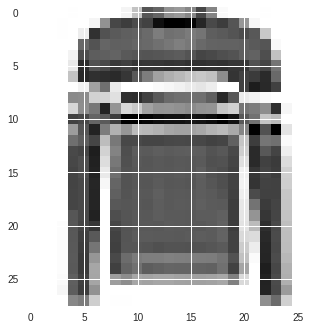

In [0]:
# 학습 셋 크기(shape) - 이미지 크기가 28x28 인 60,000 개의 학습 이미지 데이터, 60,000 개의 레이블
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# 학습 셋과 테스트 셋의 데이터 개수
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# 레이블 정의
fashion_mnist_labels = ["T-shirt/top",  # 인덱스 0
                        "Trouser",      # 인덱스 1
                        "Pullover",     # 인덱스 2 
                        "Dress",        # 인덱스 3 
                        "Coat",         # 인덱스 4
                        "Sandal",       # 인덱스 5
                        "Shirt",        # 인덱스 6 
                        "Sneaker",      # 인덱스 7 
                        "Bag",          # 인덱스 8 
                        "Ankle boot"]   # 인덱스 9

# 이미지 인덱스, 0에서 59,999 사이의 숫자를 선택할 수 있습니다.
img_index = 5
# y_train 은 에서 9까지의 레이블 포함합니다.
label_index = y_train[img_index]
# 레이블 출력해 봅니다. 예를들어 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# 학습 데이터 중에서 이미지 한 장을 보여줍니다.
plt.imshow(x_train[img_index])

## 데이터 정규화 (Data normalization)
데이터 크기를 정규화하여 대략적으로 데이터 크기를 동일하게 맞춥니다.

In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [5]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


## 데이터를 학습/평가/테스트 셋으로 나누기 <br> (Split the data into train/validation/test data sets)


*   Training data(학습 데이터) - 모델을 학습에 사용하는 데이터
*   Validation data(검증 데이터) - 하이퍼파라미터를 튜닝하고 모델들을 검증하기 위해 사용하는 데이터
*   Test data(테스트 데이터) - 검증 셋으로 모델의 초기 검사를 마친 후에, 모델을 테스트하는 데 사용하는 데이터



In [6]:
# 학습 데이터 셋을 학습 / 평가 셋으로 나눈다. (# 학습 셋: 55,000, 검증 셋: 5000)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# 입력 이미지의 크기를 (28, 28) 에서 (28, 28, 1) 로 배열 차원을 변경(reshape)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# 레이블에 원-핫 인코딩 적용 
# 원-핫 벡터는 단 하나의 차원에서만 1이고, 나머지 차원에서는 0인 벡터입니다.
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 학습 셋 크기
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# 학습용, 검증용, 테스트용 데이터셋의 개수
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


## 모델 아키텍처 만들기 (Create the model architecture)

Keras에서 모델을 정의하기위한 두 가지 API :
1. [시퀀스 모델 API](https://keras.io/models/sequential/)(순차 모델 API)
2. [함수 API](https://keras.io/models/model/)

이 튜토리얼에서는 시퀀스 모델 API를 사용합니다. 
만약 함수 API에 관심이 있다면 Sara Robinson의 블로그 [Kearas 함수 API와 TensorFlow로 와인 가격 예측하기](https://medium.com/tensorflow/predicting-the-price-of-wine-with-the-keras-functional-api-and-tensorflow-a95d1c2c1b03)를 확인해보세요. <br>

모델을 정의 할 때 Keras API 사용 :
*   Conv2D() [link text](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D/) - 컨볼루션 레이어 생성
*   Pooling() [link text](https://keras.io/layers/pooling/) - 풀링 레이어 생성
*   Dropout() [link text](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) - 드롭아웃 적용 

In [7]:
model = tf.keras.Sequential()

# 신경망의 첫 번째 레이어에서 입력 데이터 크기를 정의해야 합니다.
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# model.summary()를 통해 모델을 살펴보세요.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
__________

## 모델 컴파일하기 (Compile the model)
모델을 학습하기 전에 compile () API를 사용하여 학습 프로세스를 구성합니다. 다음의 세가지가 있습니다:

*   An optimizer 
*   A loss function 
*   A list of metrics 


In [8]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## 모델 학습시키기 (Train the model)

자 이제, fit() API 를 사용하여 모델을 학습시킵니다.

[ModelCheckpoint](https://keras.io/callbacks/#modelcheckpoint) API를 사용하여 에폭(epoch)마다 모델을 저장합니다. 검증 정확도(validation accuracy)가 향상되었을 때 저장하려면 "save_best_only = True"로 설정하면 됩니다.



In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
 2752/55000 [>.............................] - ETA: 21:09 - loss: 0.6351 - acc: 0.7769

## 가장 높은 검증 정확도의 모델 불러오기 <br> (Load Model with the best validation accuracy)

In [0]:
# 가장 높은 검증 정확도의 가중치 불러오기
model.load_weights('model.weights.best.hdf5')

## 테스트 정확도 (Test Accuracy)

In [0]:
# 테스트 셋을 통해 모델 평가
score = model.evaluate(x_test, y_test, verbose=0)

# 테스트 정확도
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9093


## 예측값 시각화하기 (Visualize prediction)
학습시킨 모델을 이용하여 예측한 값을 시각화 해보겠습니다.<br>
먼저, 테스트 데이터로부터 모델을 통해 예측값을 얻습니다.<br>
그리고, 테스트 셋에서 15개의 이미지를 뽑아서 예측 레이블과 실제 레이블을 확인해봅시다. <br>
만약 예측 레이블과 실제 레이블이 같다면 녹색, 다르다면 빨간색으로 나타납니다.

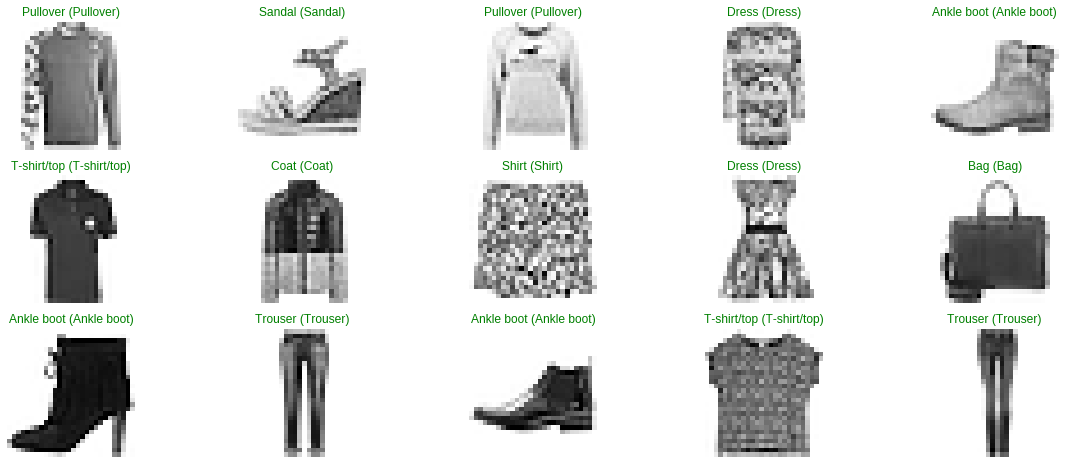

In [0]:
y_hat = model.predict(x_test)

# 무작위 샘플로 10 개의 테스트 이미지와 예측 레이블 및 실제 레이블을 그려줍니다.
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # 각각의 이미지를 보여줌
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # 각각의 이미지에 예측레이블 (실제레이블) 표시
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

## 축하합니다!

거의 90%의 정확도로  Fashion-MNIST를 분류하는 CNN을 성공적으로 학습시켰습니다!
